In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
sns.set()

In [2]:
# !wget https://raw.githubusercontent.com/mtfr1/FIFA19-dataset/master/data.csv --quiet
df = pd.read_csv('data.csv')

In [3]:

features = ['Name','Position', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']
numeric_features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']

### PCA


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_pca = df[df['Position']!= 'GK']

df_cluster = df[df['Position']!= 'GK']

df_pca = df_pca[features].dropna()
df_cluster = df_cluster[features].dropna()
df_pca = df_pca[df_pca.columns.difference(['Name','Position'])]

#Normalizando os valores
df_pca_std = sc.fit_transform(df_pca.values) 
#Gerando matriz de covariancia
cov_mat = np.cov(df_pca_std.T)
#Computando auto vetores e respectivos autovetores 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

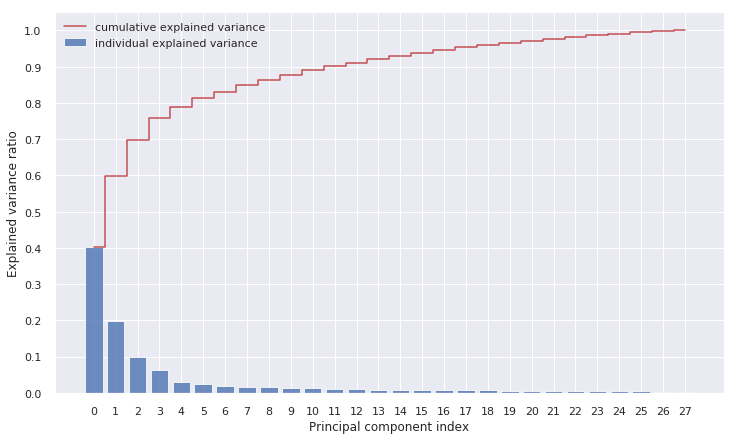

In [5]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp =  np.round(var_exp,3)
eigen_vecs
# plot explained variances
plt.bar(range(0,28), var_exp, alpha=0.8,
        align='center', label='individual explained variance')
plt.step(range(0,28), cum_var_exp, where='mid',
         label='cumulative explained variance',color="r")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
# labels = 1:29
plt.xticks(np.arange(0, 28, step=1))
plt.yticks(np.arange(0, 1.1, step=.1))

# labels
plt.show()

In [6]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#Ordenando os autovetores em ordem decrescente em relacao aos respectivos autovalores
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
#Podemos aumentar a quantidade de autovalores para melhorar a variancia capturada
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis],eigen_pairs[2][1][:, np.newaxis],eigen_pairs[3][1][:, np.newaxis],eigen_pairs[4][1][:, np.newaxis],eigen_pairs[5][1][:, np.newaxis],eigen_pairs[6][1][:, np.newaxis],eigen_pairs[7][1][:, np.newaxis]))


In [7]:
w.shape

(28, 8)

In [8]:
X = pd.DataFrame(df_pca.values.dot(w))

### Elbow

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc423eb6d68>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

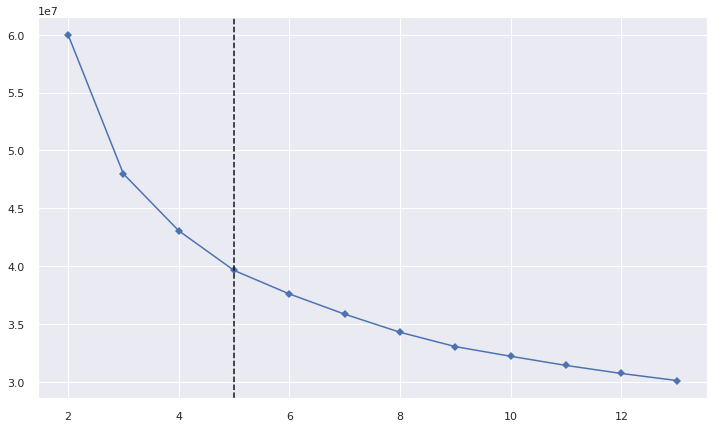

In [9]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,14),timings=False,metric='distortion' )

visualizer.fit(df_pca.values)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure

### K-means

In [10]:
DEF = ['RB','CB','LB','SW','RWB','LWB','RCB','LCB']
MID = ['CM','LOM','ROM','OM','LCM','LM','RM','LWM','RWM','RW','LW','RCM']
MIDA = ['CAM','LAM','RAM']
MIDD = ['CDM','LDM','RDM']
ATK = ['LF','RF', 'ST', 'CF', 'RS', 'LS']

HM = ['High/ Medium']
LH = ['Medium/ High']

### Adicionando os grupos de cada posição

In [11]:
posit_group = []
for row in df_cluster['Position']:
   
    if(row in DEF ):
        posit_group.append('DEF')

    elif(row in MIDA ):
        posit_group.append('MID ATK')    

    elif(row in MIDD ):
        posit_group.append('MID DEF')    

    elif(row in MID):
        posit_group.append('MID')

    elif(row in ATK):
        posit_group.append('ATK')
    else:
        print(row)


X['Position Group'] = posit_group
X['Position'] = df_cluster['Position']
X['Name'] = df_cluster['Name']

In [12]:
X_clust = X[X.columns.difference(['Name','Position','Cluster','Position Group'])]
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(X_clust)
clusters = km.labels_.tolist()
X['Cluster'] = clusters

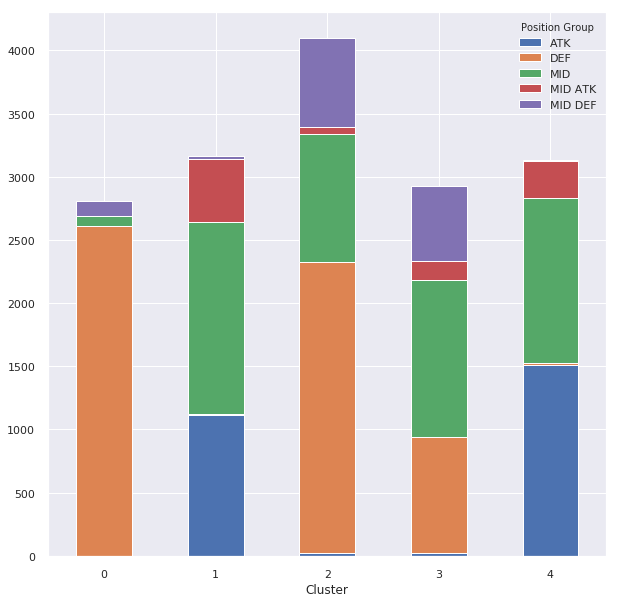

In [13]:
#plt.style.use('seaborn-dark')
df_cluster['Cluster'] = clusters
gp_clusters = df_cluster.groupby('Cluster')
a = X.groupby(['Cluster','Position Group']).size()
a.unstack(level=-1).plot(kind='bar',stacked=True, figsize = (10,10))
plt.xticks(rotation=0)
plt.show()


## Sklearn PCA com Goleiros

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
df = pd.read_csv('data.csv')

df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKRefl

In [60]:
features = ['Name','Position', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

numeric_features = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle']

In [61]:
df_pca = df.copy()
df_cluster = df.copy()
df_pca = df_pca[features].dropna()
df_cluster = df_cluster[features].dropna()
df_pca = df_pca[df_pca.columns.difference(['Name','Position'])]

X_std = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

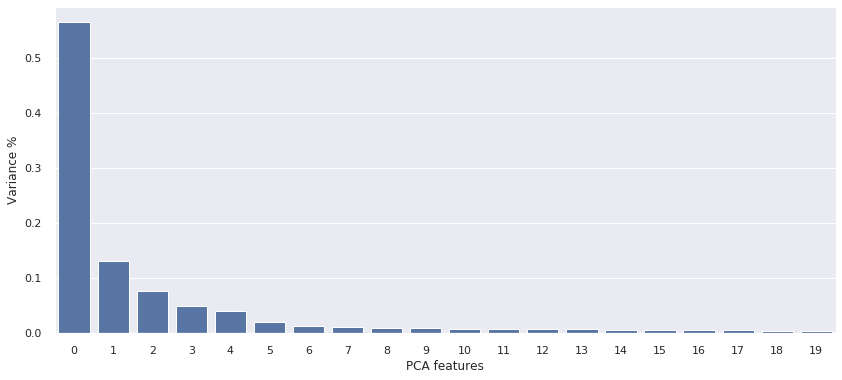

In [62]:
plt.figure(figsize=(14,6))
features = list(range(pca.n_components_))
sns.barplot(features, pca.explained_variance_ratio_, color='b')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

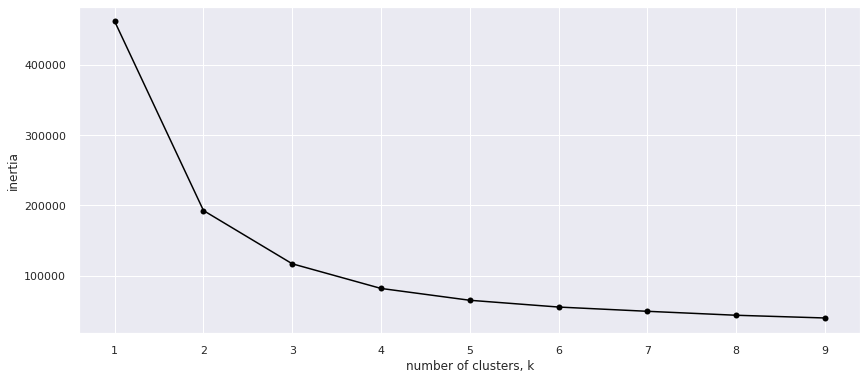

In [63]:
PCA_components = pd.DataFrame(principalComponents)
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:3])
    inertias.append(model.inertia_)

plt.figure(figsize=(14,6))
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [64]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)

In [65]:
model = KMeans(n_clusters=2)
model.fit(PCA_components)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
y_kmeans = model.predict(PCA_components)

In [67]:
PCA_sample = PCA_components.sample(n=3000, random_state=42)
y_sample = y_kmeans[PCA_sample.index]

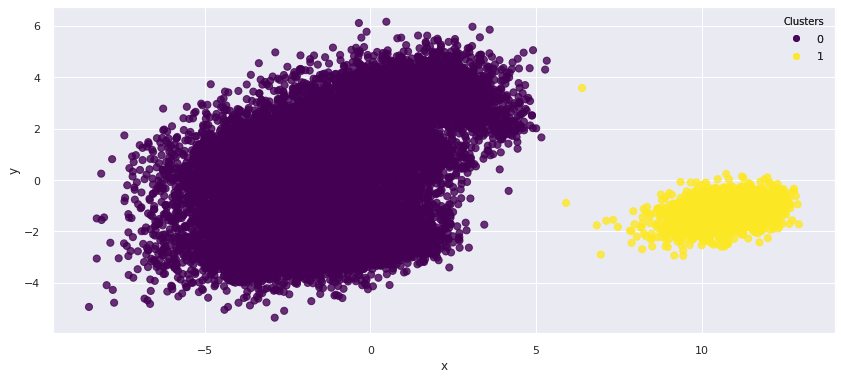

In [68]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)

x = PCA_components.iloc[:, 0] #component_1
y = PCA_components.iloc[:, 1] #component_2

scatter = ax.scatter(x, y,c=y_kmeans, cmap='viridis', s=50, alpha=.8)

legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper right", title="Clusters")

ax.add_artist(legend1)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
labels = model.labels_
silhouette_score(X_std, labels, metric='euclidean')

0.5584993069282868

In [70]:
davies_bouldin_score(X_std, labels)

0.600361480800947

In [21]:
df_cluster["Cluster"] = model.labels_.tolist()

In [22]:
df_cluster = df_cluster[["Position", "Cluster"]]

In [40]:
def not_gk(position):
    if position != 'GK':
        return "Não Goleiro"
    else:
        return "Goleiro"

df_cluster["Position"] = df_cluster["Position"].apply(lambda x: not_gk(x))

,Position,Cluster
0,Não Goleiro,0
1,Não Goleiro,0
2,Não Goleiro,0
3,Não Goleiro,1
4,Não Goleiro,0
5,Não Goleiro,0
6,Não Goleiro,0
7,Não Goleiro,0
8,Não Goleiro,0
9,Não Goleiro,1


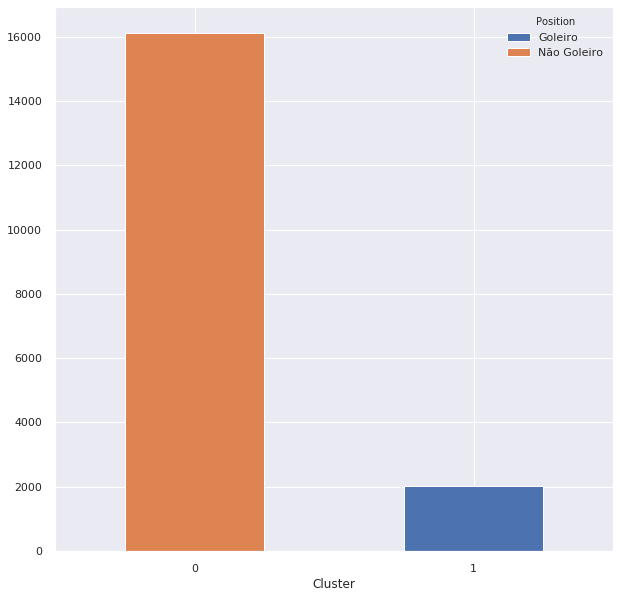

In [39]:
gp_clusters = df_cluster.groupby('Cluster')
a = df_cluster.groupby(['Cluster','Position']).size()
a.unstack(level=-1).plot(kind='bar',stacked=True, figsize = (10,10))
plt.xticks(rotation=0)
plt.show()